# Plotting facilities

More advanced plotting facilities can be achieved from [PyC2MC viewer](https://github.com/iC2MC/PyC2MC_viewer).

In [35]:
import matplotlib.pyplot as plt
from pyc2mc.core.peak import AttributedPeakList

## Loading data

Load a csv file, for example, the results of the `Molecular_formula_Assignement.ipynb` notebook
and set up an attributed peak list from it.

You can [download a csv file here](data/attributed_example.csv)

In [2]:
attpl = AttributedPeakList.from_file("data/attributed_example.csv", polarity=-1)
attpl.to_dataframe().head()

mz  intensity          formula  polarity      SN  error_ppm  \
0  205.02168    0.02678   C12 H3 O3 10B1        -1  2.4144  -0.119448   
1  217.05444    0.05608      C16 H7 18O1        -1  6.1350  -0.200035   
2  217.07558    0.04180  C13 H11 O2 18O1        -1  4.3210  -0.151037   
3  217.21278    0.02890  C12 H28 O2 13C1        -1  2.6828  -0.246564   
4  231.02990    0.03820        C12 H7 O5        -1  3.8639   0.013403   

   attributed attribution_method  
0        True            unknown  
1        True            unknown  
2        True            unknown  
3        True            unknown  
4        True            unknown

## Plot the peak list

Simple plot of the peak list, this is the default plot.

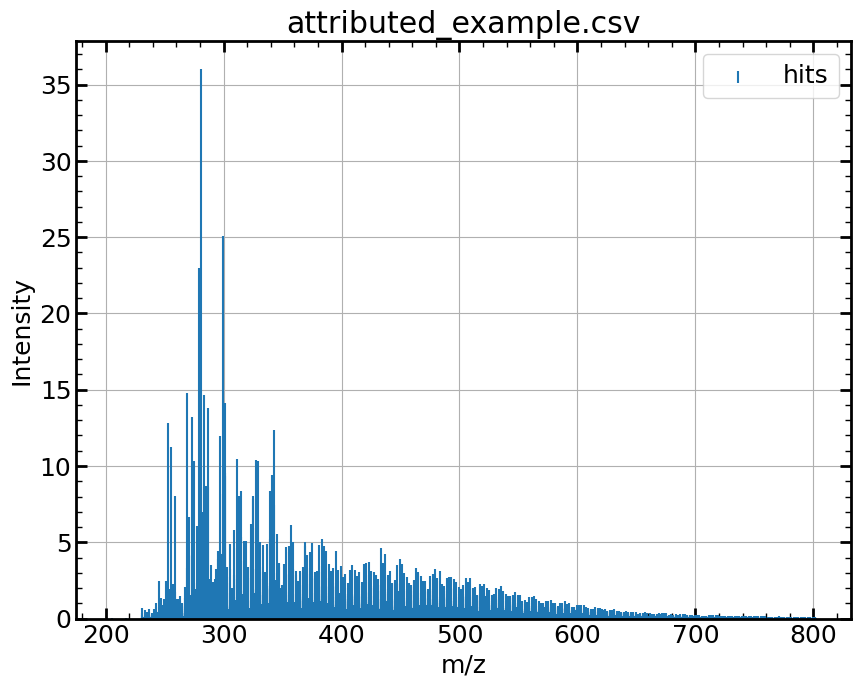

In [3]:
attpl.plot()

All plots are available from the `plot` attribute of the `AttributedPeakList` object.

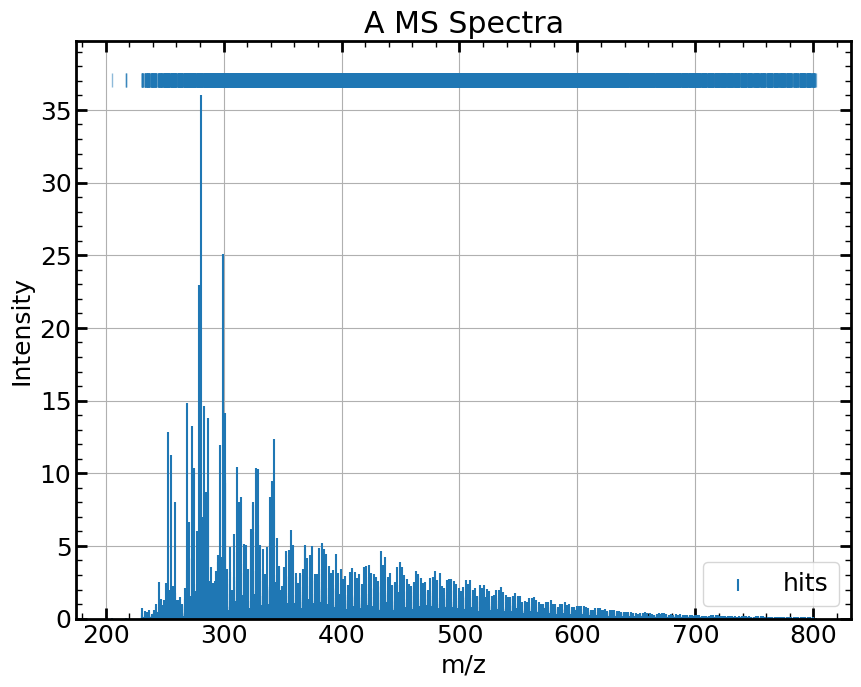

In [4]:
attpl.plot.plot_spectrum(title="A MS Spectra", rug=True)

## Identified classes

Classes can be exported as a dataframe and filtered according to their
relative abundance, or using the cumulative sum of abundance.

Classes with a relative abundance larger than 1.5%:

In [16]:
attpl.get_classes(threshold=1.5)

Chem. Group Chem. Class  Relative abundance (%)  Cumulative abundance (%)
0            O          O6                8.033049                  8.033049
1            O          O7                7.689462                 15.722511
2            O          O5                7.519508                 23.242019
3            O          O4                7.070338                 30.312357
4            O          O8                6.956881                 37.269238
5            O          O2                6.344436                 43.613674
6            O          O9                6.075601                 49.689276
7            O         O10                4.978476                 54.667752
8            O         O11                3.759694                 58.427445
9            O         O12                2.698095                 61.125540
10           O          O3                2.236300                 63.361840
11       O 13C     O7 13C1                1.796824                 65.158664
12       O 13C     O6 13C1                1.788263                 66.946928
13       O 13C     O8 13C1                1.722777                 68.669704
14         O B       O6 B1                1.718815                 70.388519
15           O         O13                1.655086                 72.043605
16       O 13C     O9 13C1                1.559178                 73.602783
17       O 13C     O5 13C1                1.545830                 75.148613

Classes that represent 80% of the total abundance, in descending order, 
without differentiating isotopic formula.

In [17]:
attpl.get_classes(cum_threshold=80, monoisotopic=True)

Chem. Group Chem. Class  Relative abundance (%)  Cumulative abundance (%)
0            O          O6               10.088124                 10.088124
1            O          O7                9.746993                 19.835117
2            O          O5                9.270582                 29.105699
3            O          O8                8.946885                 38.052584
4            O          O4                8.632128                 46.684712
5            O          O9                7.859907                 54.544619
6            O          O2                7.728091                 62.272710
7            O         O10                6.502273                 68.774983
8            O         O11                4.936542                 73.711525
9            O         O12                3.544639                 77.256164
10           O          O3                2.694547                 79.950712

Make the plot, using the same threshold options.

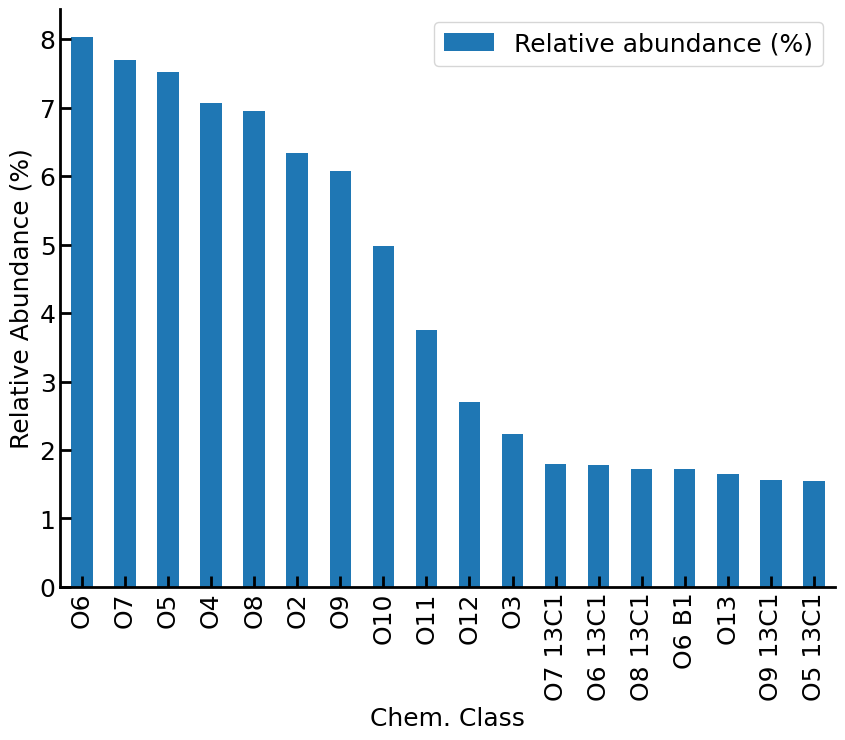

In [18]:
attpl.plot.plot_classes(threshold=1.5, monoisotopic=False)

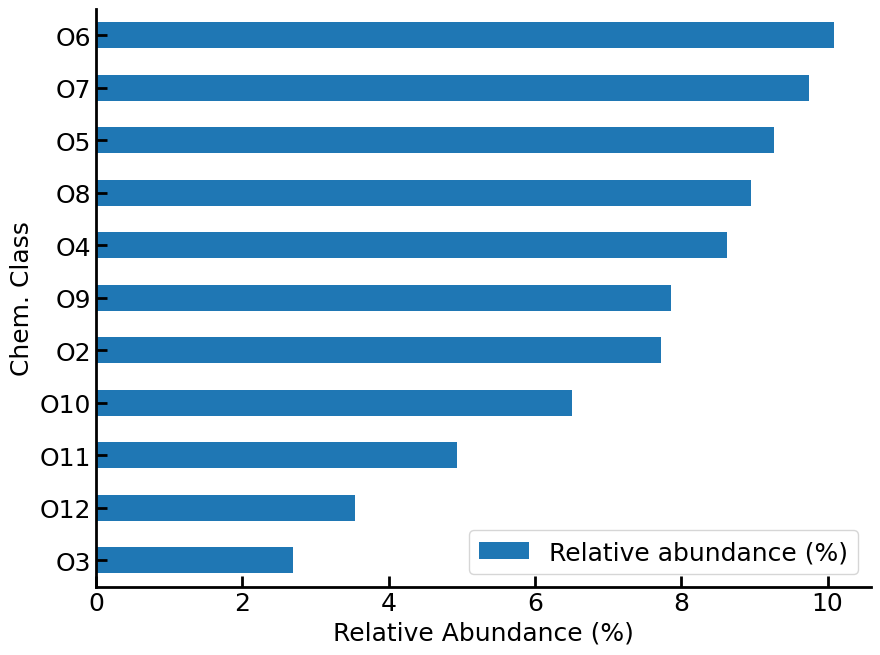

In [19]:
attpl.plot.plot_classes(cum_threshold=80, orientation="horizontal")

Circular representation of chemical classes:

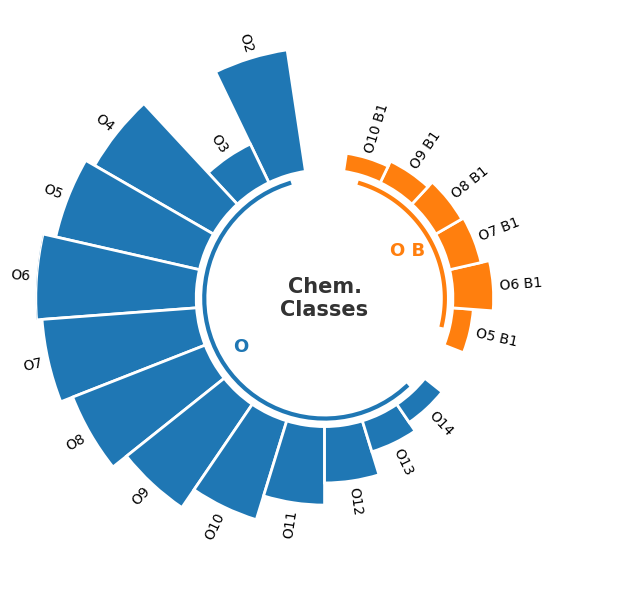

In [20]:
attpl.plot.plot_classes_circular()

## Error plots

Error plots can be displayed:

* For all the data
* For a specific chemical class or a list of chemical classes
* By superimposing a chemical class and all the data
* By combining a scatter plot of error against m/z and the error distribution

See below for examples.

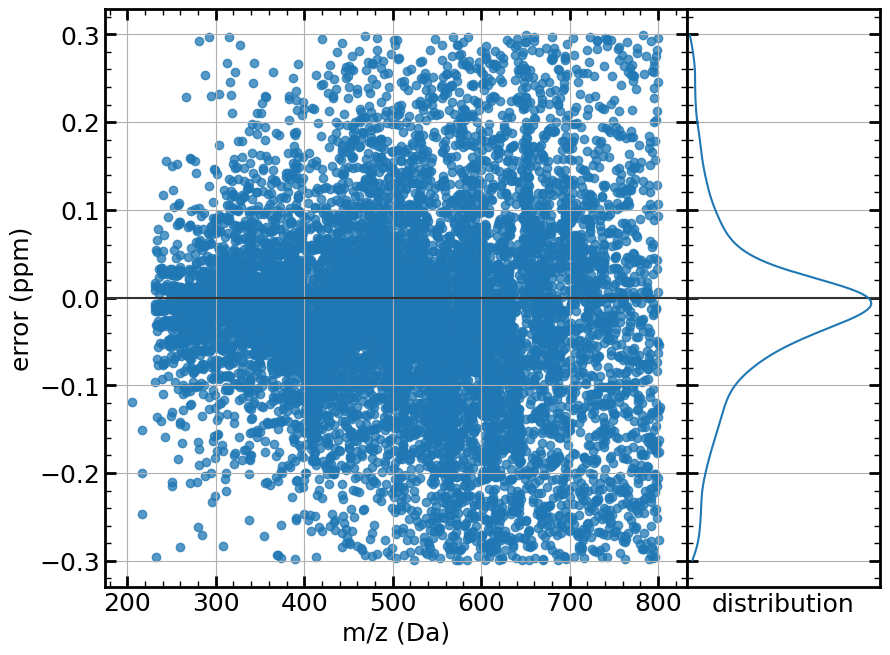

In [21]:
attpl.plot.plot_error()

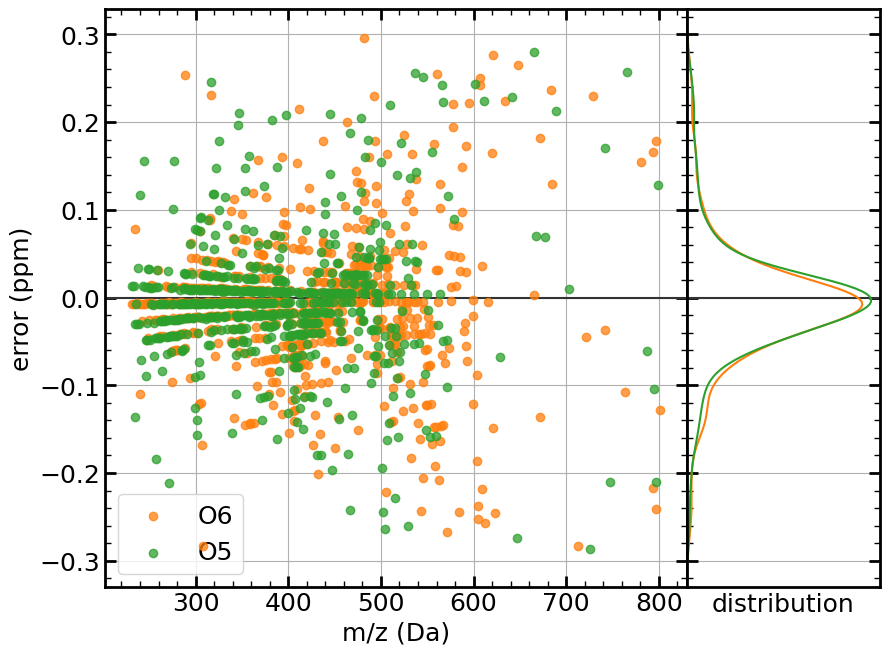

In [22]:
attpl.plot.plot_error(chem_class=["O6", "O5"]);

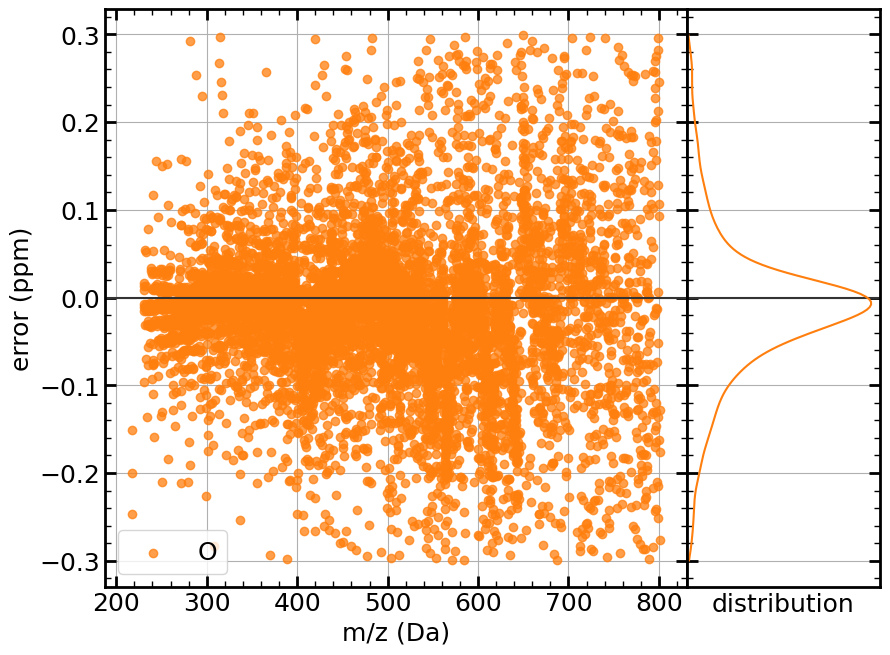

In [23]:
attpl.plot.plot_error(chem_group="O", distribution=True);

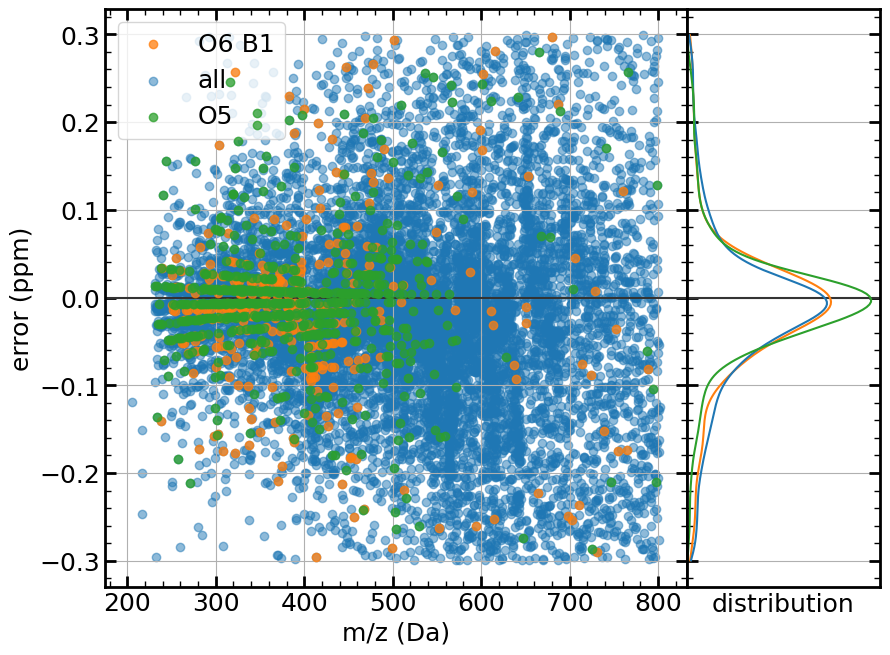

In [28]:
attpl.plot.plot_error(distribution=True, chem_class=["O6 B1", "all", "O5"]);

## DBE versus #C

The plots below represent the 2D density of the abuncance of species as 
a function of the DBE and the carbon number.

Two options are available:

* A scatter plot superimposing points for all species
* A gaussian kernel density estimate of the density

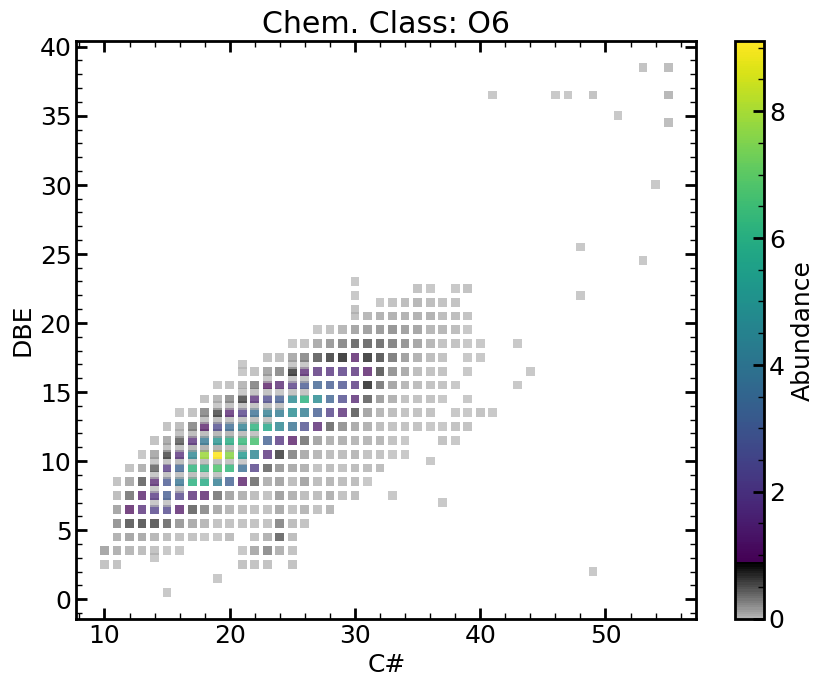

In [37]:
attpl.plot.plot_dbe(chem_class="O6", markersize=40)
plt.title("Chem. Class: O6");

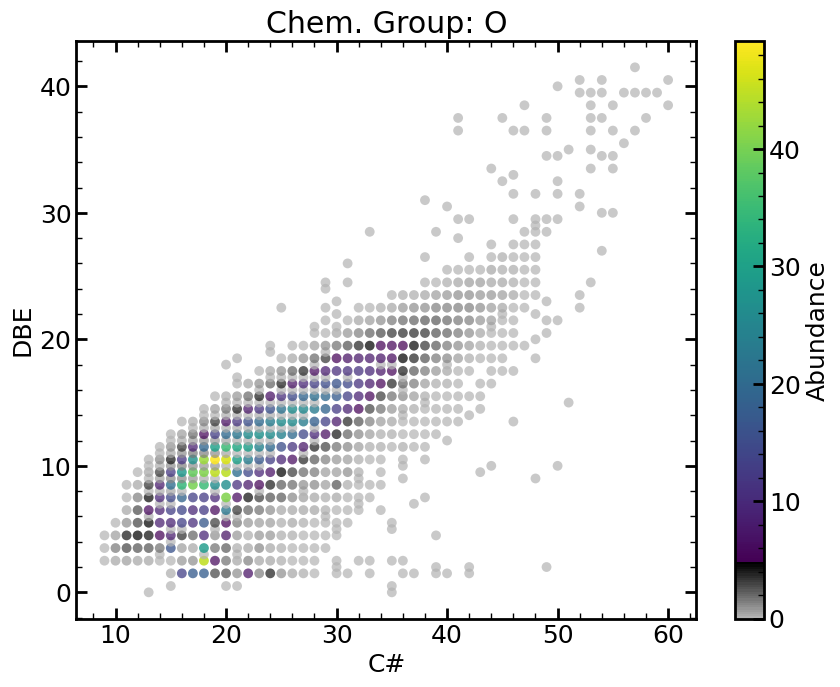

In [38]:
attpl.plot.plot_dbe(chem_group="O", marker="o", markersize=50)
plt.title("Chem. Group: O");

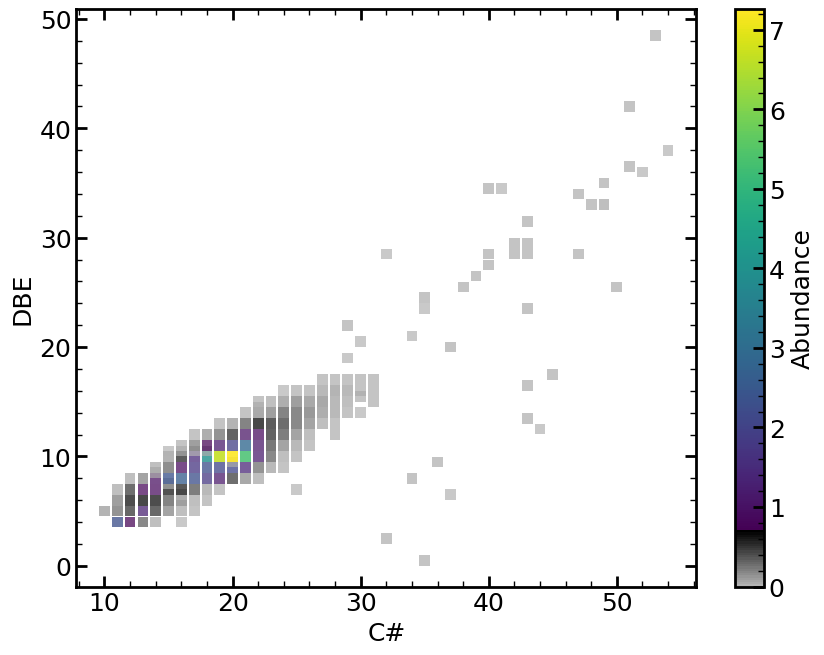

In [42]:
attpl.plot.plot_dbe(chem_class="O6 B1", marker="s", markersize=60);

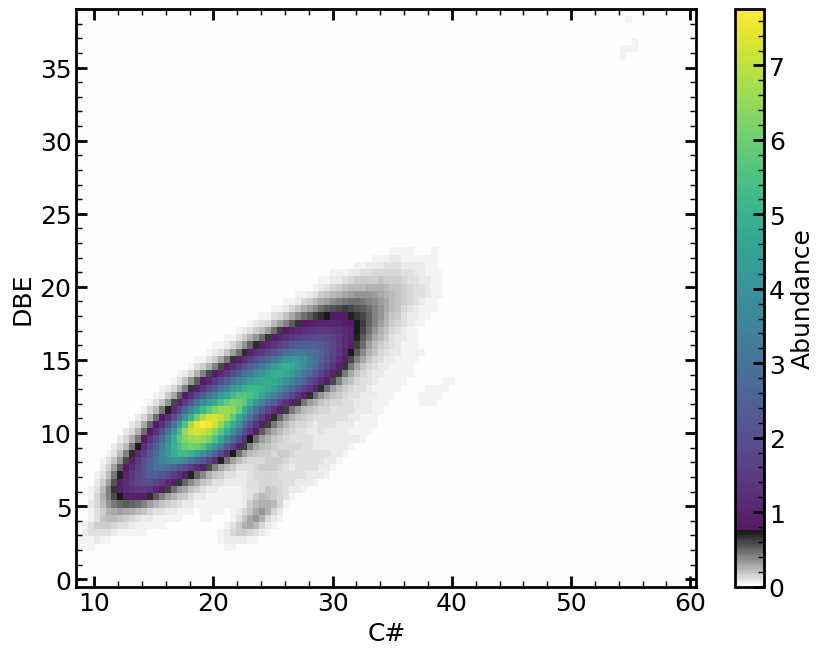

In [47]:
attpl.plot.plot_dbe(plot_type="KDE", chem_class="O6", sigma=.2);

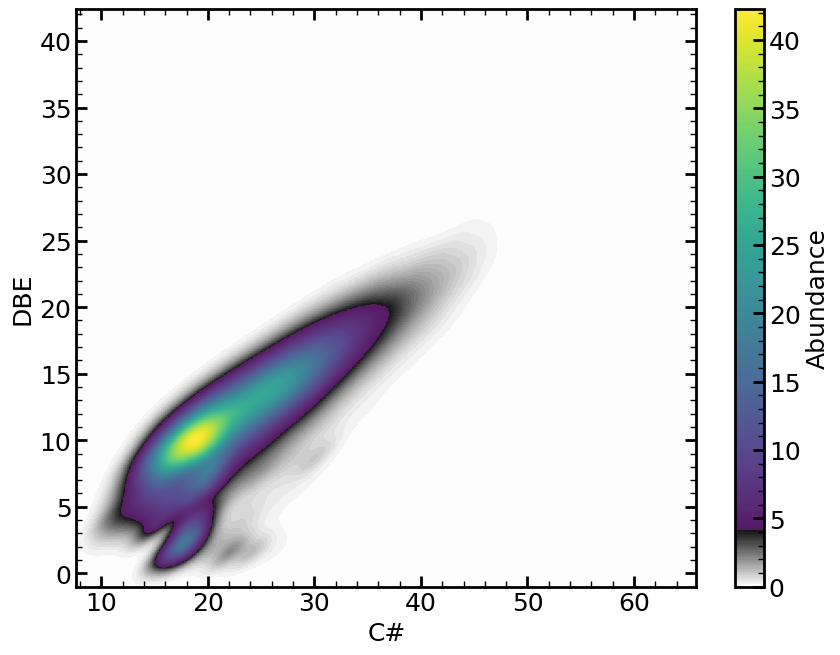

In [50]:
attpl.plot.plot_dbe(plot_type="KDE", resolution=0.2, sigma=0.2, chem_group="O");